In [1]:
from Define_Paulis import Mdot, bkt
import numpy as np
import scipy.linalg as ln

In [24]:
def K(k,N):
    out = [[0 for i in range(N)] for j in range(N)]
    for i in range(N-1):
        out[i][i+1] = k
        out[i+1][i] = k
    return np.array(out)

def U(t,k,N):
    return ln.expm(-1j*K(k,N)*t)

def M(i,N):
    out = [[0 for l in range(N)] for j in range(N)]
    out[i][i] = 1
    return np.array(out)

def Mn(i,N):
    out = np.identity(N)
    out = out - M(i,N)
    return np.array(out)

def psi0(i,N):
    out = [0 for j in range(N)]
    out[i] = 1
    return np.array(out)

In [195]:
from random import random

Nt = 5000
N=10
k=1
t=0.1
factor = 2
Pl = []
tl = []
sl = [i for i in range(N)]
mrate = [1/((r-N-1)**2) for r in range(N)]
psit = psi0(4,N)
location = psit
for ti in range(Nt):
    Pt = []
    psit = Mdot([U(t,k,N),psit])
    for i in range(N):
        Pi = bkt(psit,M(i,N),psit) 
        if np.mod(ti,int(1/mrate[i])) == 0:
            if Pi > random():
                psit = Mdot([M(i,N),psit])
                psit = psit/np.sqrt(bkt(psit,np.identity(N),psit))
                if location[i] == 0:
                    location[i] = 1
                    mrate[i] = factor*mrate[i]
            else:
                psit = Mdot([Mn(i,N),psit])
                psit = psit/np.sqrt(bkt(psit,np.identity(N),psit))
                if location[i] == 1:
                    location[i] = 0
                    mrate[i] = mrate[i]/factor
        Pt.append(Pi)
    Pl.append(Pt)
    tl.append(ti)

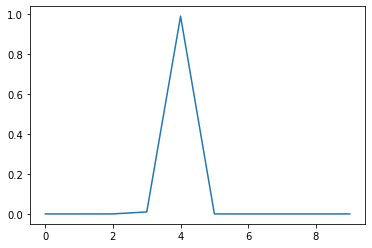

In [196]:
import matplotlib.pyplot as plt

plt.plot(sl,Pl[0])

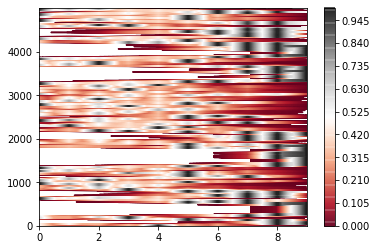

In [197]:
import matplotlib.pyplot as plt

plt.contour(sl,tl,Pl, 200, cmap='RdGy')
plt.colorbar();